# Exploring Airbnb in Athens

**Course**: 
Business Analytics Practicum I (Python)

**Student Name**: 
Evangelos Lakkas-Pyknis (e-mail: eva.lakkaspyknis@aueb.gr, registration num.: f2822306)



In [63]:
import pandas as pd

In [64]:
import numpy as np

In [65]:
import matplotlib
import matplotlib.pyplot as plt

In [66]:
import seaborn as sns

In [67]:
import matplotlib.dates as mdates

In [68]:
import IPython

In [69]:
from IPython.display import display, HTML

In [70]:
import bokeh

In [71]:
import html

## Task 1
## Neighbourhood Listings in Descending Order

First of all let's look at the datasets that contain info about the neighbourhoods and the number of listings

In [72]:
listings = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2023-12-25/visualisations/listings.csv')

In [73]:
listings_detailed = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2023-12-25/data/listings.csv.gz')

In [74]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [75]:
listings_detailed.shape

(13182, 75)

In [76]:
len(listings)

13182

In [77]:
len(listings_detailed)

13182

We notice that the two datasets have the same amount of observations but listings_detailed has more columns. Now let's see the features of the datasets that interest us.

In [78]:
listings_detailed['neighbourhood']

0                           NaN
1                Athina, Greece
2                Athina, Greece
3                           NaN
4                           NaN
                  ...          
13177            Athina, Greece
13178    Athens, Attica, Greece
13179            Athina, Greece
13180            Athina, Greece
13181    Athens, Attica, Greece
Name: neighbourhood, Length: 13182, dtype: object

In [79]:
listings_detailed['neighbourhood'].isna().sum()

5056

In [80]:
listings_detailed['neighbourhood'].unique()[:20]

array([nan, 'Athina, Greece', 'Athens, Greece', 'Athens, Attica, Greece',
       'Αθηνα, Αττικη, Greece', 'Αθήνα, Greece',
       'Αθήνα, ανω πετραλωνα, Greece', 'Αθήνα, αττικης, Greece',
       'Αθήνα, Αττική, Greece', 'Athens, Attiki, Greece',
       'Συκιές, Greece', 'Vironas, Greece', 'Athina, plaka, Greece',
       'Menemeni, Greece', 'Athina, Monastiraki, Greece',
       'Athens, attiki, Greece', 'Μενεμένη, Greece',
       'Kolonaki, Athens , Attica, Greece', 'Αθηνα, Greece',
       'Kallithea, Greece'], dtype=object)

In [81]:
listings_detailed['neighbourhood_cleansed']

0                   ΠΕΔΙΟ ΑΡΕΩΣ
1                      ΚΟΛΩΝΑΚΙ
2           ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
3        ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
4        ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
                  ...          
13177    ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
13178    ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
13179    ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
13180    ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
13181                ΚΕΡΑΜΕΙΚΟΣ
Name: neighbourhood_cleansed, Length: 13182, dtype: object

In [82]:
listings_detailed['neighbourhood_cleansed'].isna().sum()

0

In [83]:
listings_detailed['neighbourhood_cleansed'].unique()

array(['ΠΕΔΙΟ ΑΡΕΩΣ', 'ΚΟΛΩΝΑΚΙ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΠΑΤΗΣΙΑ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΠΑΓΚΡΑΤΙ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΓΚΥΖΗ', 'ΑΜΠΕΛΟΚΗΠΟΙ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΚΥΨΕΛΗ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΖΑΠΠΕΙΟ', 'ΑΚΡΟΠΟΛΗ', 'ΘΗΣΕΙΟ', 'ΑΝΩ ΚΥΨΕΛΗ',
       'ΚΕΡΑΜΕΙΚΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΣΤΑΔΙΟ', 'ΙΛΙΣΙΑ',
       'ΠΟΛΥΓΩΝΟ', 'ΚΟΛΩΝΟΣ', 'ΣΕΠΟΛΙΑ', 'ΠΕΤΡΑΛΩΝΑ', 'ΓΟΥΒΑ', 'ΓΟΥΔΙ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΠΡΟΜΠΟΝΑ',
       '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ',
       'ΡΗΓΙΛΛΗΣ', 'ΠΕΝΤΑΓΩΝΟ'], dtype=object)


We notice that 'neighbourhood_cleansed' feature is more suitable for analysis than 'neighbourhood' because it has no NA values compared to neighbourhood (has 5056 NAs, almost 38% of our observations). Also 'neighbourhood' has many values that refer to the same area but are spelled different or are written in different languages, we want to avoid that because it can lead to confusion.

In [84]:
listings['neighbourhood']

0                ΑΜΠΕΛΟΚΗΠΟΙ
1                ΑΜΠΕΛΟΚΗΠΟΙ
2                ΑΜΠΕΛΟΚΗΠΟΙ
3                ΑΜΠΕΛΟΚΗΠΟΙ
4                ΑΜΠΕΛΟΚΗΠΟΙ
                ...         
13177            ΝΕΟΣ ΚΟΣΜΟΣ
13178            ΝΕΟΣ ΚΟΣΜΟΣ
13179    ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
13180               ΚΟΛΩΝΑΚΙ
13181              ΠΕΤΡΑΛΩΝΑ
Name: neighbourhood, Length: 13182, dtype: object

In [85]:
listings['neighbourhood'].isna().sum()

0

In [86]:
listings['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΣΤΑΔΙΟ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΚΟΛΩΝΑΚΙ', 'ΠΕΤΡΑΛΩΝΑ', 'ΝΙΡΒΑΝΑ', 'ΠΑΓΚΡΑΤΙ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',
       'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ', 'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΠΡΟΜΠΟΝΑ', 'ΖΑΠΠΕΙΟ', 'ΓΟΥΔΙ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΒΟΤΑΝΙΚΟΣ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΓΚΥΖΗ', 'ΓΟΥΒΑ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΣΕΠΟΛΙΑ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΟΛΥΓΩΝΟ', 'ΠΕΝΤΑΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ', 'ΚΟΛΟΚΥΝΘΟΥ'], dtype=object)


The column neighbourhood in the listings.csv file gives us also the data we want without NAs. Now let's see the data for the listings

In [87]:
listings_detailed['host_listings_count']

0         1
1         1
2         1
3         1
4         3
         ..
13177    73
13178    10
13179    65
13180     2
13181    51
Name: host_listings_count, Length: 13182, dtype: int64

In [88]:
listings_detailed['host_listings_count'].isna().sum()

0

In [89]:
listings_detailed['calculated_host_listings_count']

0         1
1         1
2         1
3         1
4         3
         ..
13177     8
13178    10
13179    20
13180     2
13181    50
Name: calculated_host_listings_count, Length: 13182, dtype: int64

In [90]:
listings_detailed['calculated_host_listings_count'].isna().sum()

0

There are two columns in the listings_detailed dataset that provide information on the number of listings the first one is generated directly from airbnb calculations and the second one from calculations of the "insideairbnb" organization. The two columns look similar but if we look at the data
documentation (which can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596))
we notice that 'calculated_host_listings_count' feature is described to be explicitly related with geographical areas while 'host_listings_count' is not very well specified. So I will use **'calculated_host_listings_count'** column for my analysis.

In [91]:
listings['calculated_host_listings_count']

0         7
1         7
2         7
3         7
4         7
         ..
13177     1
13178     2
13179    18
13180     1
13181     4
Name: calculated_host_listings_count, Length: 13182, dtype: int64

'calculated_host_listings_count' column exists also in the **listings** dataset, so I will **use this dataset** because it doesn't have an excessive number of columns and it will be easier to handle without losing any necessary data points.

I created a subset to isolate the features I wanted

In [92]:
neighbourhood_listings = listings[['neighbourhood','calculated_host_listings_count']].copy()

In [93]:
neighbourhood_listings

neighbourhood  calculated_host_listings_count
0              ΑΜΠΕΛΟΚΗΠΟΙ                               7
1              ΑΜΠΕΛΟΚΗΠΟΙ                               7
2              ΑΜΠΕΛΟΚΗΠΟΙ                               7
3              ΑΜΠΕΛΟΚΗΠΟΙ                               7
4              ΑΜΠΕΛΟΚΗΠΟΙ                               7
...                    ...                             ...
13177          ΝΕΟΣ ΚΟΣΜΟΣ                               1
13178          ΝΕΟΣ ΚΟΣΜΟΣ                               2
13179  ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                              18
13180             ΚΟΛΩΝΑΚΙ                               1
13181            ΠΕΤΡΑΛΩΝΑ                               4

[13182 rows x 2 columns]

In [94]:
listings_grouped_per_area = neighbourhood_listings.groupby('neighbourhood')

The desired output is given by the function below. We notice that Plaka is the neighbourhood with the most listings followed by Koukaki, Neos Kosmos and Eksarcheia respectively. The areas with the least listings are Rigillis and Pentagono. 
The results from this table seem to match the expectations that someone might have since the areas that are first are known to attract tourists and visitors, have high commercial activity and are located in the center of Athens.

In [95]:
listings_grouped_per_area.agg('sum').sort_values(by='calculated_host_listings_count',ascending=False)

calculated_host_listings_count
neighbourhood                                                   
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                                     30052
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                                        17121
ΝΕΟΣ ΚΟΣΜΟΣ                                                12371
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                                   12108
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                           11038
ΠΑΓΚΡΑΤΙ                                                    8266
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                                             7164
ΑΚΡΟΠΟΛΗ                                                    5637
ΠΕΤΡΑΛΩΝΑ                                                   5360
ΑΜΠΕΛΟΚΗΠΟΙ                                                 5343
ΚΕΡΑΜΕΙΚΟΣ                                                  4996
ΚΟΛΩΝΑΚΙ                                                    4727
ΘΗΣΕΙΟ                                                      3852
ΛΥΚΑΒΗΤΤΟΣ                                                  2992
ΖΑΠΠΕΙΟ                                                     2889
ΚΥΨΕΛΗ                                                      2707
ΙΛΙΣΙΑ                                                      2302
ΣΤΑΔΙΟ                                                      2235
ΓΟΥΔΙ                                                       2141
ΝΙΡΒΑΝΑ                                                     1917
ΠΕΔΙΟ ΑΡΕΩΣ                                                 1647
ΠΑΤΗΣΙΑ                                                     1315
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                                            1123
ΑΝΩ ΚΥΨΕΛΗ                                                  1122
ΓΚΑΖΙ                                                        945
ΓΟΥΒΑ                                                        822
ΕΛΛΗΝΟΡΩΣΩΝ                                                  719
ΓΚΥΖΗ                                                        705
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                                               700
ΚΟΛΩΝΟΣ                                                      693
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                                               679
ΒΟΤΑΝΙΚΟΣ                                                    647
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                                              535
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                                            398
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                                             360
ΝΕΑ ΚΥΨΕΛΗ                                                   294
ΑΝΩ ΠΑΤΗΣΙΑ                                                  286
ΣΕΠΟΛΙΑ                                                      244
ΠΟΛΥΓΩΝΟ                                                      53
ΠΡΟΜΠΟΝΑ                                                      53
ΡΙΖΟΥΠΟΛΗ                                                     42
ΚΟΛΟΚΥΝΘΟΥ                                                    29
ΡΗΓΙΛΛΗΣ                                                       5
ΠΕΝΤΑΓΩΝΟ                                                      4

In [96]:
neighbourhood_listings_df = pd.DataFrame(listings_grouped_per_area.agg('sum').sort_values(by='calculated_host_listings_count',ascending=False))

## Task 2
## Neighbourhood Prices in Descending Order

In this task I am interested into examining some price stats based on the neighbourhood of the property. So I will need a feature that is reffering to price. Let's have look at the listings and listings_detailed datasets.

In [97]:
listings_detailed['price']

0         $20.00
1        $293.00
2         $60.00
3         $93.00
4        $119.00
          ...   
13177    $151.00
13178     $54.00
13179    $214.00
13180     $60.00
13181     $72.00
Name: price, Length: 13182, dtype: object

In [98]:
listings_detailed['price'].isna().sum()

366

In [99]:
listings_detailed['price'].dtype

dtype('O')

In [100]:
listings['price']

0         93.0
1         41.0
2         42.0
3         48.0
4         48.0
         ...  
13177     39.0
13178     56.0
13179     57.0
13180    120.0
13181     65.0
Name: price, Length: 13182, dtype: float64

In [101]:
listings['price'].isna().sum()

366

In [102]:
listings['price'].dtype

dtype('float64')

Both datasets have information about price they have the same amount of NAs which is not excessive (it's about 2% of our sample but I will handle them later on) however price in the listings_detailed has not a numeric data type and that will cause problems in the calculations that I want to do. So I will work again with the listings dataset

In [103]:
neighbourhood_prices = listings[['neighbourhood','price']].copy()

In [104]:
neighbourhood_prices

neighbourhood  price
0              ΑΜΠΕΛΟΚΗΠΟΙ   93.0
1              ΑΜΠΕΛΟΚΗΠΟΙ   41.0
2              ΑΜΠΕΛΟΚΗΠΟΙ   42.0
3              ΑΜΠΕΛΟΚΗΠΟΙ   48.0
4              ΑΜΠΕΛΟΚΗΠΟΙ   48.0
...                    ...    ...
13177          ΝΕΟΣ ΚΟΣΜΟΣ   39.0
13178          ΝΕΟΣ ΚΟΣΜΟΣ   56.0
13179  ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ   57.0
13180             ΚΟΛΩΝΑΚΙ  120.0
13181            ΠΕΤΡΑΛΩΝΑ   65.0

[13182 rows x 2 columns]

In [105]:
neighbourhood_prices['price'].isna().sum()

366

I handled the missing values of price in the neighbourhood_prices subset and listings original dataset by finding which neighbourhood corrensponds to this missing value and then filling it with the median price of this specific neighbourhood. This method fills the NAs in a reasonable way based on location and by using the median instead of mean I am avoiding the negative effect that some extreme values might have.

In [106]:
neighbourhood_prices['price'] = neighbourhood_prices.groupby('neighbourhood')['price'].transform(lambda x: x.fillna(x.median()))

In [107]:
neighbourhood_prices['price'].isna().sum()

0

In [108]:
listings['price'] = listings.groupby('neighbourhood')['price'].transform(lambda x: x.fillna(x.median()))

In [109]:
print(listings['price'].isna().sum())

0


In [110]:
prices_grouped_per_area = neighbourhood_prices.groupby('neighbourhood')

The price stats grouped by neighbourhood are given in the dataframe below. I stored this table in  a dataframe in order to merge it with the one that contains the number of listings per neighbourhood and create the desired output

In [111]:
price_stats_df = prices_grouped_per_area['price'].agg(['mean','median','std']).sort_values(by='median',ascending=False)

In [112]:
price_stats_df

mean  median          std
neighbourhood                                                    
ΡΗΓΙΛΛΗΣ                          653.500000   139.0  1071.934544
ΖΑΠΠΕΙΟ                           209.284884   107.0   621.419574
ΚΟΛΩΝΑΚΙ                          123.011710    97.0    94.898970
ΑΚΡΟΠΟΛΗ                          188.379747    94.0   708.614106
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ            131.125458    89.0   301.747769
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ               112.028144    85.0   175.339668
ΚΕΡΑΜΕΙΚΟΣ                        115.829545    81.0   141.886634
ΘΗΣΕΙΟ                            107.685139    77.0   109.172896
ΙΛΙΣΙΑ                             84.137615    70.0    52.439119
ΛΥΚΑΒΗΤΤΟΣ                        100.213415    67.0   113.607805
ΣΤΑΔΙΟ                            116.433735    65.0   510.647664
ΠΑΓΚΡΑΤΙ                           83.688091    65.0    98.919786
ΓΚΑΖΙ                              77.538462    63.0    50.560340
ΝΕΟΣ ΚΟΣΜΟΣ                        82.027888    62.0    73.024008
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ          168.715299    61.0  2565.611237
ΠΕΤΡΑΛΩΝΑ                          80.635638    60.0   102.576841
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                     86.037736    60.0    66.937388
ΕΛΛΗΝΟΡΩΣΩΝ                        72.324324    60.0    44.579345
ΓΟΥΒΑ                              64.175000    58.0    34.525637
ΓΟΥΔΙ                              70.962500    57.0    57.147488
ΑΜΠΕΛΟΚΗΠΟΙ                        66.748373    57.0    35.634888
ΒΟΤΑΝΙΚΟΣ                         138.692308    56.0   504.177079
ΠΟΛΥΓΩΝΟ                           68.846154    55.0    46.296170
ΠΡΟΜΠΟΝΑ                           60.333333    55.0    27.618615
ΠΕΔΙΟ ΑΡΕΩΣ                        68.653846    55.0    53.025506
ΣΕΠΟΛΙΑ                            84.200000    52.0   162.631290
ΝΕΑ ΚΥΨΕΛΗ                         58.583333    51.5    31.432490
ΚΥΨΕΛΗ                             65.238351    50.5    60.902960
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   63.902410    50.0    64.222764
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                    58.081395    48.0    45.171103
ΑΝΩ ΠΑΤΗΣΙΑ                        55.250000    48.0    27.106492
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                  51.522727    46.0    27.465329
ΚΟΛΩΝΟΣ                            53.309735    46.0    25.594740
ΠΑΤΗΣΙΑ                            59.526627    45.0   119.276792
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                   50.527778    45.0    30.619775
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                    88.989831    45.0   469.950490
ΓΚΥΖΗ                              53.500000    45.0    43.838567
ΡΙΖΟΥΠΟΛΗ                          51.153846    45.0    23.589709
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                     53.310680    44.0    34.525361
ΠΕΝΤΑΓΩΝΟ                          43.500000    43.5     4.949747
ΑΝΩ ΚΥΨΕΛΗ                         46.033898    41.5    26.015916
ΝΙΡΒΑΝΑ                            47.755952    41.0    24.285600
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                   52.441341    41.0    37.929424
ΚΟΛΟΚΥΝΘΟΥ                         40.800000    40.0     6.143522

In [113]:
prices_with_listingsnumber_per_area = pd.merge(neighbourhood_listings_df,price_stats_df, on= 'neighbourhood', how='inner')

The answer in the posed question is given below

In [114]:
prices_with_listingsnumber_per_area.sort_values(by='median',ascending=False)

calculated_host_listings_count        mean  \
neighbourhood                                                                  
ΡΗΓΙΛΛΗΣ                                                       5  653.500000   
ΖΑΠΠΕΙΟ                                                     2889  209.284884   
ΚΟΛΩΝΑΚΙ                                                    4727  123.011710   
ΑΚΡΟΠΟΛΗ                                                    5637  188.379747   
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                                     30052  131.125458   
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                                        17121  112.028144   
ΚΕΡΑΜΕΙΚΟΣ                                                  4996  115.829545   
ΘΗΣΕΙΟ                                                      3852  107.685139   
ΙΛΙΣΙΑ                                                      2302   84.137615   
ΛΥΚΑΒΗΤΤΟΣ                                                  2992  100.213415   
ΣΤΑΔΙΟ                                                      2235  116.433735   
ΠΑΓΚΡΑΤΙ                                                    8266   83.688091   
ΓΚΑΖΙ                                                        945   77.538462   
ΝΕΟΣ ΚΟΣΜΟΣ                                                12371   82.027888   
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                                   12108  168.715299   
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                                               679   86.037736   
ΠΕΤΡΑΛΩΝΑ                                                   5360   80.635638   
ΕΛΛΗΝΟΡΩΣΩΝ                                                  719   72.324324   
ΓΟΥΒΑ                                                        822   64.175000   
ΓΟΥΔΙ                                                       2141   70.962500   
ΑΜΠΕΛΟΚΗΠΟΙ                                                 5343   66.748373   
ΒΟΤΑΝΙΚΟΣ                                                    647  138.692308   
ΠΡΟΜΠΟΝΑ                                                      53   60.333333   
ΠΕΔΙΟ ΑΡΕΩΣ                                                 1647   68.653846   
ΠΟΛΥΓΩΝΟ                                                      53   68.846154   
ΣΕΠΟΛΙΑ                                                      244   84.200000   
ΝΕΑ ΚΥΨΕΛΗ                                                   294   58.583333   
ΚΥΨΕΛΗ                                                      2707   65.238351   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                           11038   63.902410   
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                                              535   58.081395   
ΑΝΩ ΠΑΤΗΣΙΑ                                                  286   55.250000   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                                            398   51.522727   
ΚΟΛΩΝΟΣ                                                      693   53.309735   
ΡΙΖΟΥΠΟΛΗ                                                     42   51.153846   
ΓΚΥΖΗ                                                        705   53.500000   
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                                             7164   88.989831   
ΠΑΤΗΣΙΑ                                                     1315   59.526627   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                                             360   50.527778   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                                               700   53.310680   
ΠΕΝΤΑΓΩΝΟ                                                      4   43.500000   
ΑΝΩ ΚΥΨΕΛΗ                                                  1122   46.033898   
ΝΙΡΒΑΝΑ                                                     1917   47.755952   
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                                            1123   52.441341   
ΚΟΛΟΚΥΝΘΟΥ                                                    29   40.800000   

                                  median          std  
neighbourhood                                          
ΡΗΓΙΛΛΗΣ                           139.0  1071.934544  
ΖΑΠΠΕΙΟ                            107.0   621.419574  
ΚΟΛΩΝΑΚΙ                            97.0    94.898970  
ΑΚΡΟΠΟΛΗ                            94.0   708.614106  
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-

Here a strange thing that someone can notice is that Rigillis area is first in terms of median price despite the fact that it has very few listings, however we notice that the standard deviation of the price for this area is the second highest so that may indicate that there are some properties in this area that have higher price than expected. The other results are pretty much expected areas like Zappeio, Acropolis and Kolonaki are known to be high-class and have higher prices and areas like Patissia, Kipseli, Agios Nikolaos and Plateia Amerikis are downgraded and are expected to have lower prices.

## Task 3
## Availability per Day

In this task I will read another dataset named calendar because I need information about specific dates that doesn't exist in the datasets that I currently have. I also need to specify the data type of the 'date' column to datetime data type

In [115]:
calendar = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2023-12-25/data/calendar.csv.gz', parse_dates=['date'])

In [116]:
calendar.head(6)

listing_id       date available    price  adjusted_price  minimum_nights  \
0       10595 2023-12-25         f  $180.00             NaN             2.0   
1       10595 2023-12-26         f  $180.00             NaN             2.0   
2       10595 2023-12-27         f  $180.00             NaN             2.0   
3       10595 2023-12-28         f  $180.00             NaN             2.0   
4       10595 2023-12-29         f  $180.00             NaN             2.0   
5       10595 2023-12-30         f  $180.00             NaN             2.0   

   maximum_nights  
0           180.0  
1           180.0  
2           180.0  
3           180.0  
4           180.0  
5           180.0

If we examine the features of this dataset and their documentation we see that there is a boolean variable named 'available' which indicates if a listing is available or not in the given date which will help me create the plot that will show availability per day.

Based on the 'available' variable I created a new column in the dataset named 'total_available_listings' by adding all the true values of 'available' for each date. Based on these points I created my plot.

In [117]:
calendar['availability_numeric'] = (calendar['available'] == 't').astype(int)


In [118]:
calendar['total_available_listings'] = calendar.groupby('date')['availability_numeric'].transform('sum')

In [119]:
calendar.head(6)

listing_id       date available    price  adjusted_price  minimum_nights  \
0       10595 2023-12-25         f  $180.00             NaN             2.0   
1       10595 2023-12-26         f  $180.00             NaN             2.0   
2       10595 2023-12-27         f  $180.00             NaN             2.0   
3       10595 2023-12-28         f  $180.00             NaN             2.0   
4       10595 2023-12-29         f  $180.00             NaN             2.0   
5       10595 2023-12-30         f  $180.00             NaN             2.0   

   maximum_nights  availability_numeric  total_available_listings  
0           180.0                     0                      2510  
1           180.0                     0                      4161  
2           180.0                     0                      4481  
3           180.0                     0                      4383  
4           180.0                     0                      4122  
5           180.0                     0                      4052

Then I **sorted the dates** on the calendar, that is an important step on the code because otherwise the plot will be messy and we will not be able to draw conclusions from it

In [120]:
calendar = calendar.sort_values(by='date')

In [121]:
calendar = calendar.drop(columns=['availability_numeric'])

The demanded plot is generated by the following code, using the matplotlib library

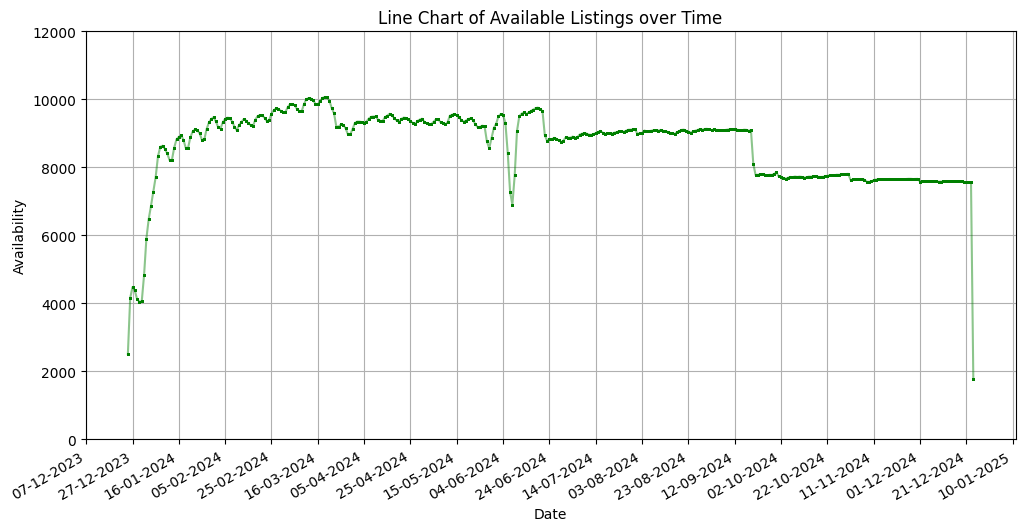

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(calendar['date'], calendar['total_available_listings'], marker='o', color='green', linestyle='-', alpha=0.45, markersize=0.9)
plt.xlabel('Date')
plt.ylabel('Availability')
plt.title('Line Chart of Available Listings over Time')
plt.grid(True)
plt.ylim(0,12000)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

We see that the highest availability is observed during March and less listings are available during June and through winter months.

The dates cannot be displayed in large detail because the x axis will be overpopulated and the plot will not be easy to read. In case we want to look up the availability for a specific date we can use an interactive linechart which is generated with Bokeh library and is saved in a html type file named: 'interactive_availability_linechart'

In [123]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_file, save
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.embed import file_html


In [124]:
p = figure(x_axis_type='datetime', width=800, height=400, title='Interactive Line Chart of Available Listings over Time')
p.line(calendar['date'], calendar['total_available_listings'], line_width=2, legend_label='Available Listings', line_color='green')
hover = HoverTool()
hover.tooltips = [('Date', '@x{%F}'), ('Availability', '@y')]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Availability'
output_file('interactive_availability_linechart.html')
save(p)

'C:\\Users\\Μπαμπης\\Desktop\\jupyter folder\\interactive_availability_linechart.html'

## Task 4
## Reviews, Occupacy per Listing, Average Income

To gain insight on the reviews and analyze them based on listings I need to read a different subset that contains this kind of information 

In [125]:
reviews_df = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2023-12-25/visualisations/reviews.csv',parse_dates=['date'])

In [126]:
reviews_df.columns

Index(['listing_id', 'date'], dtype='object')

In [127]:
reviews_df.head(5)

listing_id       date
0       10595 2011-05-20
1       10595 2012-08-15
2       10595 2013-05-20
3       10595 2014-05-04
4       10595 2014-09-13

So based on how many times each listing is found on the reviews dataset I counted how many reviews there are for each listing. I notice that all the data I need are present in this dataset and there is no need to read a more detailed file. Also from the data source for that can be found [here](http://insideairbnb.com/get-the-data/) for Athens it is noted that the summarized reviews csv file is recommended for visualizations so I will follow this advice and draw my histogram based on this dataset.

In [128]:
reviews_per_listing = reviews_df.groupby('listing_id')['date'].count()


In [129]:
reviews_per_listing

listing_id
10595                  45
10990                  71
10993                  93
10995                  30
27262                  23
                       ..
1044854083716723786     1
1045025263246273195     1
1045798883283175139     1
1047177827314723302     1
1048451054076287616     1
Name: date, Length: 11068, dtype: int64

I calculated the size of the bins based on the min and max values of the counted number of reviews

In [130]:
min_reviews = reviews_per_listing.min()
max_reviews = reviews_per_listing.max()

In [131]:
max_bin = np.ceil(max_reviews / 100) * 100
bins = np.arange(min_reviews, max_bin + 101, 100)

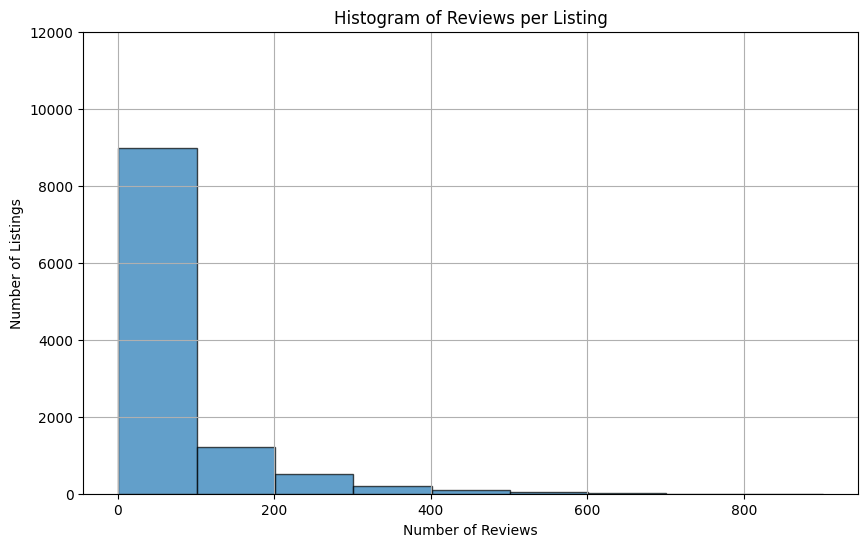

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_listing, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Reviews per Listing')
plt.ylim(0,12000)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

I extracted the month and the year of each review based on the 'date' feature in order to group and count the reviews and later on calculate the average occupacy, price and income per month  

In [133]:
reviews_df['month'] = reviews_df['date'].dt.month

In [134]:
reviews_df['year'] = reviews_df['date'].dt.year

In [135]:
reviews_df.head(5)

listing_id       date  month  year
0       10595 2011-05-20      5  2011
1       10595 2012-08-15      8  2012
2       10595 2013-05-20      5  2013
3       10595 2014-05-04      5  2014
4       10595 2014-09-13      9  2014

In [136]:
reviews_per_month = reviews_df.groupby(['listing_id', 'year', 'month']).size().reset_index(name='reviews_count')

In [137]:
average_occupacy = reviews_per_month['reviews_count'].mean() *2

In [138]:
display(HTML(f"<b>Average Occupacy</b> per Month is: {round(average_occupacy,2)}"))

In [139]:
average_price = listings['price'].mean()


In [140]:
display(HTML(f"<b>Average Price</b> per Month is: {round(average_price,2)}"))

In [141]:
income = average_price*average_occupacy*3

In [142]:
print(f"Average Income per Month is: {round(income,2)}")

Average Income per Month is: 2111.01


In [143]:
display(HTML(f"<b>Average Income</b> per Month is: {round(income,2)}"))


## Task 5
## Listings per Room Type

To do an analysis for the absolute numbers and percentages of the listings according to the room type that they offer I created once again a subset based on the 'room type' feature that gives information on how the listing room can be described and on listings_count 

In [144]:
roomtypes_df = listings.loc[:, ['room_type','calculated_host_listings_count']].copy()

In [145]:
total_listings2 = roomtypes_df['calculated_host_listings_count'].sum()

In [146]:
grouped_per_roomtypes = roomtypes_df.groupby(['room_type'])['calculated_host_listings_count'].agg(['sum', 'count'])

In [147]:
grouped_per_roomtypes['percentage'] = round((grouped_per_roomtypes['sum'] / total_listings2) * 100,2)

After groupping the subset by the room type and implementing the necessary functions the generated results are given below

In [148]:
display(HTML(f"<b>Absolute Numbers:</b>"))
print(grouped_per_roomtypes['sum'].sort_values(ascending=False))

display(HTML(f"<b>\nPercentages:</b>"))
print(grouped_per_roomtypes['percentage'].sort_values(ascending=False))

room_type
Entire home/apt    143017
Private room        13591
Hotel room           1093
Shared room           937
Name: sum, dtype: int64


room_type
Entire home/apt    90.15
Private room        8.57
Hotel room          0.69
Shared room         0.59
Name: percentage, dtype: float64


The results of the analysis seem reasonable because airbnb is a platform that is known to facilitate individuals or real estate companies that possess many appartments to gain an income rather than hotels, so it is expected that hotels will have a few listings. Also it is more feasible to rent a whole appartment/house to someone than a private room so it is logical that the entire home category will be the one with the most listings.

Finally I created a subset and implemented a double group by firstly using neighbourhood and then room type so I generated a table with a complex index that shows the number of listings per neighrbourhood and room type

In [149]:
roomtypes_area_df = listings.loc[:, ['room_type','calculated_host_listings_count','neighbourhood']].copy()

In [150]:
room_area_group = roomtypes_area_df.groupby(['neighbourhood','room_type'])

In [151]:
room_area_group.agg('sum')

calculated_host_listings_count
neighbourhood                    room_type                                      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt                             679
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt                             188
                                 Private room                                172
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt                            9135
                                 Private room                               1723
...                                                                          ...
ΣΤΑΔΙΟ                           Shared room                                   1
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt                             431
                                 Hotel room                                   40
                                 Private room                                 24
                                 Shared room                                  40

[112 rows x 1 columns]

## Task 6
## Prices per Day

Here I will use again the calendar dataset since the analysis is based on dates. Calendar has the data for the price of each listing but the datatype of the 'price' variable is not numeric and also has a dollar sign that will create a problem in the conversion to numeric data type. So I have to fix this issue with a regular expression

In [152]:
calendar.head(5)

listing_id       date available    price  adjusted_price  \
0                     10595 2023-12-25         f  $180.00             NaN   
950636             27389393 2023-12-25         f   $85.00             NaN   
37235               1372935 2023-12-25         t  $130.00             NaN   
4041945  914951248228671139 2023-12-25         t  $210.00             NaN   
370920             16596657 2023-12-25         f   $39.00             NaN   

         minimum_nights  maximum_nights  total_available_listings  
0                   2.0           180.0                      2510  
950636              1.0          1125.0                      2510  
37235               2.0          1125.0                      2510  
4041945             2.0           365.0                      2510  
370920              3.0          1125.0                      2510

In [153]:
calendar['price'] = pd.to_numeric(calendar['price'].replace('[^\d.]', '', regex=True), errors='coerce')

In [154]:
calendar['price'].head()

0          180.0
950636      85.0
37235      130.0
4041945    210.0
370920      39.0
Name: price, dtype: float64

I grouped the prices by each day and calculated their mean to create the requested table

In [155]:
average_price_per_day = round(calendar.groupby(['date'])['price'].mean(),2)

In [156]:
average_price_per_day

date
2023-12-25     88.52
2023-12-26    101.39
2023-12-27    101.39
2023-12-28    101.39
2023-12-29    101.39
               ...  
2024-12-20    101.39
2024-12-21    101.39
2024-12-22    101.39
2024-12-23    101.39
2024-12-24    130.11
Name: price, Length: 366, dtype: float64

The graph which visualizes the table is generated by the code below using matplotlib

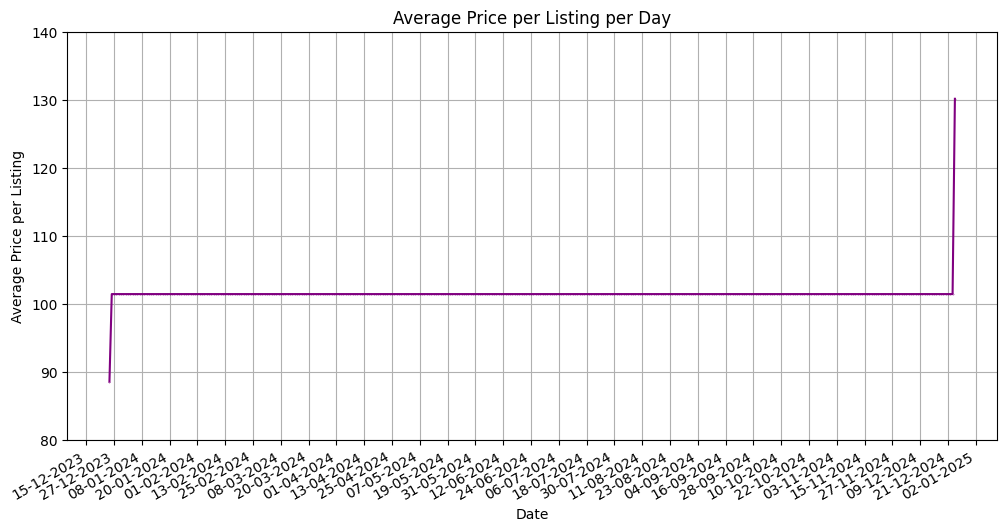

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(calendar['date'].unique(), average_price_per_day, marker='o', color='purple',markersize=0.2)
plt.xlabel('Date')
plt.ylabel('Average Price per Listing')
plt.title('Average Price per Listing per Day')
plt.ylim(80,140)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

We notice the the mean price per listing per day is very stable through time with two sudden increases happening in December

## Task 7
## Listings per Host

In order to Create a table with the number of listings per host I grouped the listings dataset based on the column that identifies uniquely every host ('host_id'), counted the listings for each one and sorted them in a descending order

In [158]:
listings_per_host = listings.groupby('host_id')['id'].count().reset_index()


In [159]:
listings_per_host.columns = ['host_id', 'num_listings']


In [160]:
listings_per_host = listings_per_host.sort_values(by='num_listings', ascending=False)


In [161]:
display(HTML("Table with Number of Listings per Host:"))
print(listings_per_host)


        host_id  num_listings
606    20104194           121
2045  113548208           101
1797   90390850            68
2043  113353393            64
1145   47267002            62
...         ...           ...
2268  133681771             1
2267  133627331             1
2266  133586844             1
2265  133513526             1
5839  551669451             1

[5840 rows x 2 columns]


The table with the count of listings per host can be visualized with matplotlib by runnining the code below

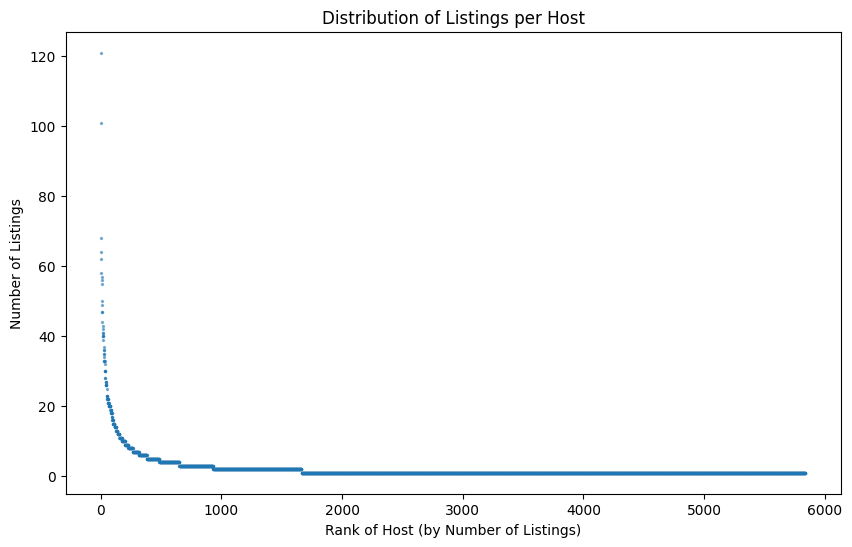

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(listings_per_host) + 1), listings_per_host['num_listings'],s=2,alpha=0.5)
plt.xlabel('Rank of Host (by Number of Listings)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host')
plt.show()


The code is modified (by adding the xscale parameter) to create a plot with the x axis in a logarithmic scale. Because of the logarithmic scale the slope of the scatter plot has now become less steep and the points that correnspond to hosts that have a few listings are now more concentrated.

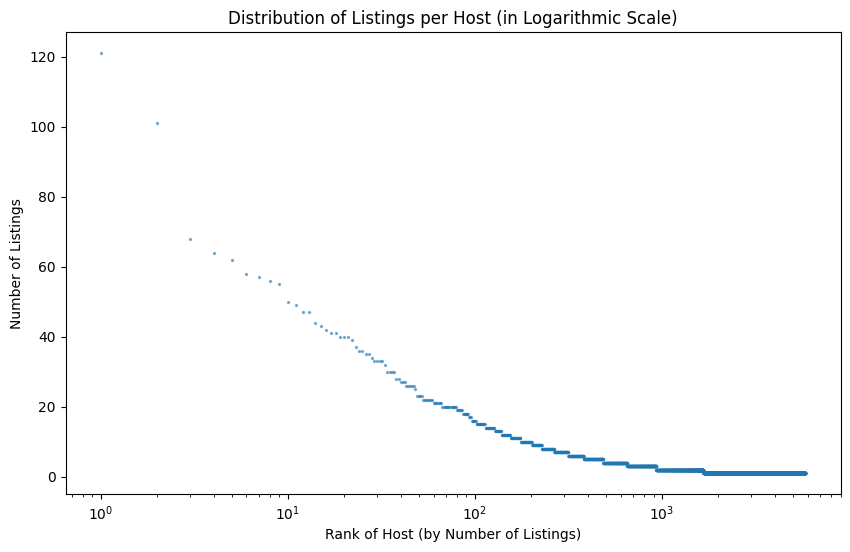

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(listings_per_host) + 1), listings_per_host['num_listings'],s=2,alpha=0.5)
plt.xlabel('Rank of Host (by Number of Listings)')
plt.xscale('log')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host (in Logarithmic Scale)')
plt.show()

## Task 8
## Listings Visualization

Now let's see if the columns that I have in the listings dataset have information in order to display a sort description for each listing or if I need to use another dataset to create the interactive map

In [164]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Reading the names of the columns all the columns seem pretty self-explanatory except the name feature that probably refers to the listing and is not very clear what information it offers and it also has poor description in the data documentation. So let's see the values of this column

In [165]:
listings['name']

0        Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...
1        Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...
2        Rental unit in Athens · ★4.83 · Studio · 2 bed...
3        Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
4        Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...
                               ...                        
13177    Condo in Athina · ★New · 1 bedroom · 2 beds · ...
13178    Rental unit in Athina · ★New · 1 bedroom · 2 b...
13179    Rental unit in Athina · ★New · 2 bedrooms · 2 ...
13180    Rental unit in Athina · ★New · 2 bedrooms · 3 ...
13181    Rental unit in Athina · ★New · 1 bedroom · 1 b...
Name: name, Length: 13182, dtype: object

We see that this column provide some short description on the appartment/room that is rented, how many beds it has etc.. So it seems to be a good input for the interactive map

The listings dataset also has geographical information about each listing (longitude and latitude) which I can use in order to locate them into the map I will draw

In [166]:
listings['name'].isna().sum()

0

This column is clean and has no NA values this fact will facilitate my analysis because no further cleaning is needed

In [167]:
listings['latitude'].isna().sum()

0

In [168]:
listings['longitude'].isna().sum()

0

The longitude and the latitude columns don't have NA values, so each listing can be located to a specific point of the map

In [169]:
latitude_range = (37.9, 38.1)
longitude_range = (23.6, 23.8)

In [170]:
out_of_athens_listings = listings[
    ~((listings['latitude'].between(*latitude_range)) &
      (listings['longitude'].between(*longitude_range)))
]

In [171]:
print(out_of_athens_listings)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license]
Index: []


Before the creation of the interactive map I checked if there are any listings that their latitude or longitude lead to areas beyond Athens, I know that Athens has this latitude and longitude respectively (37.9838, 23.7275) so I checked if all the listings are in a range close to these values (in order to include not only the center of Athens but also neighbourhoods which are a little further away). All the listings satisfy this condition (because the dataframe that is printed is empty) so there is no need for further cleaning before drawing the map.

In [172]:
listings['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΣΤΑΔΙΟ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΚΟΛΩΝΑΚΙ', 'ΠΕΤΡΑΛΩΝΑ', 'ΝΙΡΒΑΝΑ', 'ΠΑΓΚΡΑΤΙ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',
       'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ', 'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΠΡΟΜΠΟΝΑ', 'ΖΑΠΠΕΙΟ', 'ΓΟΥΔΙ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΒΟΤΑΝΙΚΟΣ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΓΚΥΖΗ', 'ΓΟΥΒΑ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΣΕΠΟΛΙΑ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΟΛΥΓΩΝΟ', 'ΠΕΝΤΑΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ', 'ΚΟΛΟΚΥΝΘΟΥ'], dtype=object)

In [173]:
import folium

In [174]:
from folium.plugins import MarkerCluster


In [175]:
import html 

In [176]:
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=13, control_scale=True, max_zoom=15)


In [177]:
marker_cluster = MarkerCluster().add_to(athens_map)

for index, listing in listings.iterrows():
    # Ensure the description is HTML-safe
    safe_description = html.escape(str(listing['name'])) if pd.notnull(listing['name']) else ''
    
    folium.Marker(
        location=[listing['latitude'], listing['longitude']],
        popup=folium.Popup(safe_description, parse_html=True),
        icon=folium.Icon(icon='home', color='orange')
    ).add_to(marker_cluster)

In [178]:
folium.GeoJson('http://data.insideairbnb.com/greece/attica/athens/2023-12-25/visualisations/neighbourhoods.geojson').add_to(athens_map)


In [179]:
athens_map.save('athens_listings_map.html')
